### **MACHINE LEARNING NA INDUSTRIA** - ***PREVISÃO DE EMISSÃO DE GASES & PRODUÇÃO COM JANELA TEMPORAL***

Este documento tem o intuíto de documentar e demonstrar a criação de modelos de machine learning usando janela temporal e a bibliotéca de automl "Pycaret"

---
#### PROBLEMA : <br><br> Uma indústria gostaria de identificar os melhores cenários (combinações de máquinas) para emissões de gases.

No exemplo temos 5 tipos de máquinas, e a quantidade ativa naquela data e horário.
Sobre o dataset:
*   Foram coletados dados de 15 em 15 minutos
*   Cada máquina possui monitoramento de temperatura e consumo de energia
*   pressão do sistema
*   Se houve injeção de gás no sistema (1 = Sim, 0 = Não)
*   produção
*   emissão de gases

<br>
Para essa demonstração, será utilizado um dataframe com dados fictícios gerados de forma aleatória

### Gerando dataset fictícios

---



In [1]:
# Importando bibliotécas
import pandas as pd
import random
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go

from datetime import datetime, timedelta

# Começo e fim da coleta de dados
data_inicial = datetime(2022, 6, 1)
data_final = datetime(2023, 12, 31)
delta_tempo = timedelta(minutes=15)

# Criando variáveis
temperatura_m1 = []
temperatura_m2 = []
temperatura_m3 = []
temperatura_m4 = []
temperatura_m5 = []
datas_horas = []
pressao = []
producao = []
injecao_gas = []
consumo_energia_m1 = []
consumo_energia_m2 = []
consumo_energia_m3 = []
consumo_energia_m4 = []
consumo_energia_m5 = []
maquina_tipo_1 = []
maquina_tipo_2 = []
maquina_tipo_3 = []
maquina_tipo_4 = []
maquina_tipo_5 = []
emissao_gases = []

# Gerando dados fictícios
data_atual = data_inicial
while data_atual <= data_final:
    datas_horas.append(data_atual)
    temperatura_m1.append(random.uniform(20, 40))
    temperatura_m2.append(random.uniform(25, 35))
    temperatura_m3.append(random.uniform(30, 45))
    temperatura_m4.append(random.uniform(15, 25))
    temperatura_m5.append(random.uniform(35, 50))
    pressao.append(random.uniform(1, 10))
    producao.append(random.uniform(100, 200))
    injecao_gas.append(random.uniform(0, 1))
    consumo_energia_m1.append(random.uniform(50, 100))
    consumo_energia_m2.append(random.uniform(60, 110))
    consumo_energia_m3.append(random.uniform(70, 120))
    consumo_energia_m4.append(random.uniform(40, 90))
    consumo_energia_m5.append(random.uniform(80, 130))
    maquina_tipo_1.append(random.choice([0, 5]))
    maquina_tipo_2.append(random.choice([0, 4]))
    maquina_tipo_3.append(random.choice([0, 4]))
    maquina_tipo_4.append(random.choice([0, 2]))
    maquina_tipo_5.append(random.choice([0, 1]))
    emissao_gases.append(random.uniform(0, 10))
    data_atual += delta_tempo

# Criando dataframe
dados_maquinas = pd.DataFrame({
    'Data e Hora': datas_horas,
    'Máquina 1': maquina_tipo_1,
    'Máquina 2': maquina_tipo_2,
    'Máquina 3': maquina_tipo_3,
    'Máquina 4': maquina_tipo_4,
    'Máquina 5': maquina_tipo_5,
    'Temperatura Máquina 1 (°C)': temperatura_m1,
    'Temperatura Máquina 2 (°C)': temperatura_m2,
    'Temperatura Máquina 3 (°C)': temperatura_m3,
    'Temperatura Máquina 4 (°C)': temperatura_m4,
    'Temperatura Máquina 5 (°C)': temperatura_m5,
    'Consumo de Energia Máquina 1 (kWh)': consumo_energia_m1,
    'Consumo de Energia Máquina 2 (kWh)': consumo_energia_m2,
    'Consumo de Energia Máquina 3 (kWh)': consumo_energia_m3,
    'Consumo de Energia Máquina 4 (kWh)': consumo_energia_m4,
    'Consumo de Energia Máquina 5 (kWh)': consumo_energia_m5,
    'Pressão (bar)': pressao,
    'producao (m³)': producao,
    'Injeção de Gás': injecao_gas,
    'Emissão de Gases (kg/h)': emissao_gases
})

# Exibindo as 5 primeiras linhas do dataset
dados_maquinas.head(5)


,Data e Hora,Máquina 1,Máquina 2,Máquina 3,Máquina 4,Máquina 5,Temperatura Máquina 1 (°C),Temperatura Máquina 2 (°C),Temperatura Máquina 3 (°C),Temperatura Máquina 4 (°C),Temperatura Máquina 5 (°C),Consumo de Energia Máquina 1 (kWh),Consumo de Energia Máquina 2 (kWh),Consumo de Energia Máquina 3 (kWh),Consumo de Energia Máquina 4 (kWh),Consumo de Energia Máquina 5 (kWh),Pressão (bar),producao (m³),Injeção de Gás,Emissão de Gases (kg/h)
0,2022-06-01 00:00:00,0,4,0,0,0,35.979343,33.966341,30.787733,17.870168,47.970938,72.126768,76.532068,91.137316,52.451026,97.811965,2.861220,117.348585,0.994750,6.015093
1,2022-06-01 00:15:00,5,4,4,0,1,27.726989,25.636836,44.160695,21.493524,42.509012,81.983950,79.630946,73.928367,82.827134,113.928245,7.479984,107.611323,0.713756,3.137000
2,2022-06-01 00:30:00,0,0,0,0,0,39.598850,33.700294,33.230094,20.753742,38.670112,65.787476,77.209172,83.140377,84.368294,116.730417,4.545141,120.025482,0.980872,6.490497
3,2022-06-01 00:45:00,0,0,4,2,0,29.635543,27.129277,35.917254,21.639364,45.948832,52.559383,67.519741,82.420683,68.032678,87.146256,4.373069,118.305622,0.878372,8.245144
4,2022-06-01 01:00:00,0,0,4,0,0,30.463733,32.470992,43.244144,16.385082,47.122525,63.847391,95.041634,87.840094,64.343303,105.309189,4.077578,102.181993,0.382523,1.764990


In [2]:
# Tamanho do dataset
dados_maquinas.shape

(55489, 20)

O cliente te informa, que o único dado que ele gostaria de informar/incluir para realizar a previsão, é o cenário das máquinas (quantidades de cada máquina ativa).
Imagine que ao olhar as combinações de cenários com as emissões você se deparasse com essa visão (Gráfico gerado com caso real):

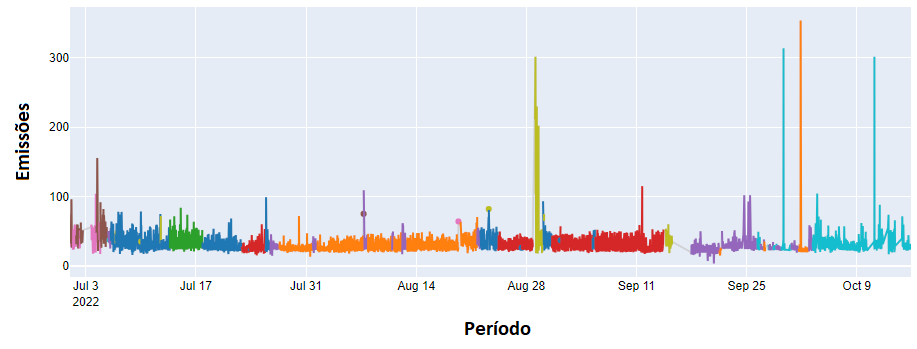

In [3]:
from IPython.display import Image, display
display(Image(filename='images/emissao_periodo.png'))

Contextualizando, no eixo horizontal temos o período, e no eixo vertical temos a quantidade de gás emitido.
As cores ditinguem os cenários, por exemplo o marrom é o cenario [2,3,1,0,0] ou seja, 2 'máquinas 1', 3 'máquinas 2' e assim por diante.

Observando o gráfico, você já deve ter pensado, que existe uma dificuldade na previsão, pois um mesmo cenário (cor) possui valores muito diferentes de emissões, e que talvez apenas a remoção de outliers não atenda, lmbrando que o cliente gostaria de prever todos os cenários, independente do momento.

### Abordagem de janela temporal

---



Como o cliente gostaria de prever as emissões para determinado cenário, apenas informando o conjunto (cenários) de máquinas ativas e como vemos variações de emissões para um mesmo cenário, o modelo não conseguiria generalizar apenas com esses inputs.<br>
Os dados guardados são do momento da captura, não conseguiríamos utilizar para previsão, pois não teríamos essa informação futura para o modelo (vazamento de dados). <br>
A solução abordada foi criar janelas temporais também conhecida como 'lags', ou seja, criar novas variáveis com os valores dos períodos anteriores. <br>
Assim, poderíamos usar todas as varíaveis de períodos anteriores, para tentarem prever uma emissão de gás atual, ou futura. Por exemplo, o dataset possui no dia '2022-06-01 00:15:00' o cenário [0,1,1,0,1] e emissão 5,96. Para prevê-lo eu utilizaria os dados anteriores no dia '2022-06-01 00:00:00' e o período da previsão (prever 1 hora, 5 horas, dias..) dependeria apenas do agrupamento da janela temporal.
<br>
<br>
Complicou? Vai ficar mais simples conforme o desenvolvimento.

In [4]:
# Criação de janela temporal
# df = dataframe que será manipulado.
# passos = quantidade de períodos anteriores a serem gerados.
# variaveis_shift = variáveis que serão manipuladas, aceitando lista ou 'all' para todas.
def shift(df, passos, variaveis_shift):
  df = df.sort_values(by='Data e Hora', ascending=True)
  if variaveis_shift == 'all':
    variaveis_shift = df.columns.drop('Data e Hora')
  for qtd in range(1,passos+1,1):
    for var in variaveis_shift:
      df[var+'_T'+str(qtd)] = df[var].shift(qtd)
  df = df[passos:].reset_index(drop=True)
  return df

In [5]:
# Criando dataframe com janela temporal
dados_maquinas_shift = shift(dados_maquinas, 5, 'all')
dados_maquinas_shift.head(3)

,Data e Hora,Máquina 1,Máquina 2,Máquina 3,Máquina 4,Máquina 5,Temperatura Máquina 1 (°C),Temperatura Máquina 2 (°C),Temperatura Máquina 3 (°C),Temperatura Máquina 4 (°C),...,Temperatura Máquina 5 (°C)_T5,Consumo de Energia Máquina 1 (kWh)_T5,Consumo de Energia Máquina 2 (kWh)_T5,Consumo de Energia Máquina 3 (kWh)_T5,Consumo de Energia Máquina 4 (kWh)_T5,Consumo de Energia Máquina 5 (kWh)_T5,Pressão (bar)_T5,producao (m³)_T5,Injeção de Gás_T5,Emissão de Gases (kg/h)_T5
0,2022-06-01 01:15:00,0,0,0,0,0,34.372646,34.880180,43.515006,24.056735,...,47.970938,72.126768,76.532068,91.137316,52.451026,97.811965,2.861220,117.348585,0.994750,6.015093
1,2022-06-01 01:30:00,5,4,0,2,1,24.330588,32.365638,41.035743,19.642058,...,42.509012,81.983950,79.630946,73.928367,82.827134,113.928245,7.479984,107.611323,0.713756,3.137000
2,2022-06-01 01:45:00,5,0,4,0,0,36.061144,33.275306,41.419602,19.422218,...,38.670112,65.787476,77.209172,83.140377,84.368294,116.730417,4.545141,120.025482,0.980872,6.490497


In [6]:
# Exemplo prático da janela temporal
dados_maquinas_shift[['Data e Hora','Emissão de Gases (kg/h)','Emissão de Gases (kg/h)_T1','Emissão de Gases (kg/h)_T2','Emissão de Gases (kg/h)_T3','Emissão de Gases (kg/h)_T4','Emissão de Gases (kg/h)_T5']].head(6)

,Data e Hora,Emissão de Gases (kg/h),Emissão de Gases (kg/h)_T1,Emissão de Gases (kg/h)_T2,Emissão de Gases (kg/h)_T3,Emissão de Gases (kg/h)_T4,Emissão de Gases (kg/h)_T5
0,2022-06-01 01:15:00,7.975587,1.764990,8.245144,6.490497,3.137000,6.015093
1,2022-06-01 01:30:00,8.791508,7.975587,1.764990,8.245144,6.490497,3.137000
2,2022-06-01 01:45:00,7.133135,8.791508,7.975587,1.764990,8.245144,6.490497
3,2022-06-01 02:00:00,4.774115,7.133135,8.791508,7.975587,1.764990,8.245144
4,2022-06-01 02:15:00,1.324412,4.774115,7.133135,8.791508,7.975587,1.764990
5,2022-06-01 02:30:00,2.715202,1.324412,4.774115,7.133135,8.791508,7.975587


Como podemos observar acima, criamos uma janela temporal de 5 passos, ou seja de 15min, 30min, 45min, 1h e 1h15 min antes.
Então podemos usar essas séries temporais de emissão, caso possuam correlação causal (aqui criamos o dataframe de forma aleatória, ou seja, não teremos correlação) para prever as variáveis atuais, como a própria emissão atual.

<ipython-input-7-107b988aa8ba>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

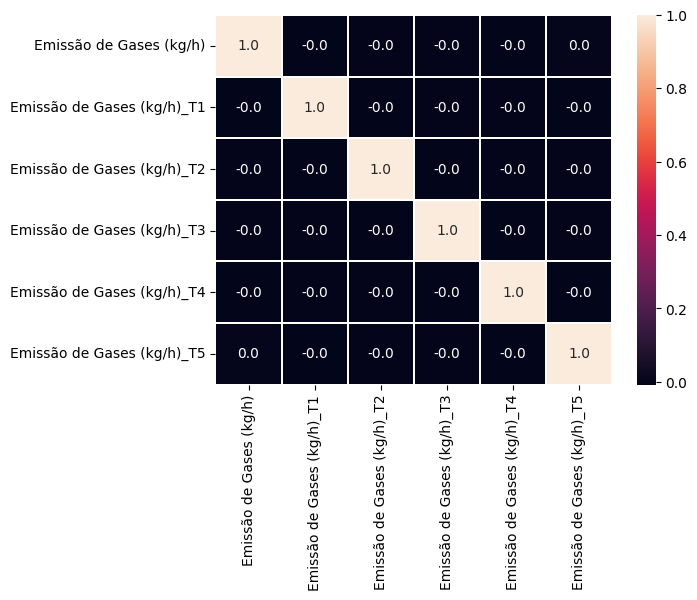

In [7]:
# Exemplo de verificação de correlação entre as variáveis temporais criadas

var_corr = ['Emissão de Gases (kg/h)','Emissão de Gases (kg/h)_T1','Emissão de Gases (kg/h)_T2','Emissão de Gases (kg/h)_T3','Emissão de Gases (kg/h)_T4','Emissão de Gases (kg/h)_T5']
correlation = dados_maquinas_shift.corr()
plot = sn.heatmap(correlation[var_corr][correlation.index.isin(var_corr)], annot = True, fmt=".1f", linewidths=.01)
plot

Abaixo vemos uma correlação utilizando dados do caso real mascarado, onde a boa prática é a eliminação da multicolinearidade.

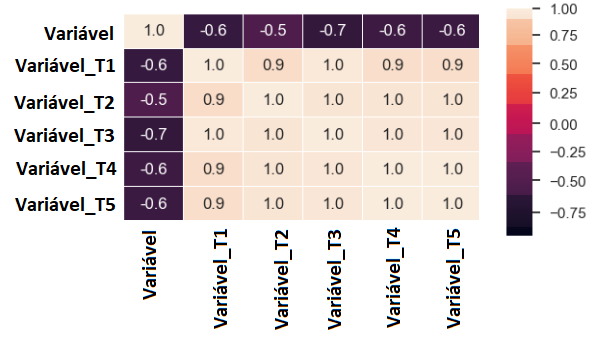

In [8]:
from IPython.display import Image, display
display(Image(filename='images/correlacao_periodo.png'))

### Modelagem de emissão

---

Para a criação do modelo de machine learning deste exemplo, iremos utilizar a biblioteca de automl "Pycaret", onde conseguimos facilmente comparar diversos modelos, testar vários tratamentos e abordagens

In [9]:
from pycaret.regression import *

Irei utilizar 75% da base para treinamento, 25% para teste e o último mês, que não foi contabilizado na separação das bases como validação.

Nossa base desconsiderando o último mês possui 52.603 registros, 75% são 39.452, sendo assim basta filtrar utilizando o index.

In [10]:
# Separando bases de treino e teste
corte_treino = x = dados_maquinas_shift['Data e Hora'][len(dados_maquinas_shift)*0.75]

df_treino = dados_maquinas_shift[dados_maquinas_shift['Data e Hora']<=corte_treino]
df_teste = dados_maquinas_shift[(dados_maquinas_shift['Data e Hora']>corte_treino) & (dados_maquinas_shift['Data e Hora']<'2023-12-01')]
df_oot = dados_maquinas_shift[(dados_maquinas_shift['Data e Hora']>='2023-12-01')]

Para exemplificar o uso do Pycaret, criamos o setup com alguns tratamentos, como normalização, remoção de outlier e multicolinearidade. Existem várias outras abordagens, veja em https://pycaret.gitbook.io/docs/.

Um ponto importante em relação a janela temporal é, aqui estamos removendo as variáves do presente, ou seja, variáveis que não teríamos a informação, pois o cliente irá informar apenas o cenários (quantidade de cada tipo de máquina ativa), sendo assim deixei a seleção de variáveis inativa, para preservar todas e entender o impacto de cada uma no melhor modelo. <br><br>

*Lembrando que como o dataset foi criado de forma aleatória, toda a modelagem será apenas para conhecimento da ferramenta*.

In [11]:
# Criação de setup com parâmetros a serem utilizados e comparados
setup = setup(data = df_treino,
              target = 'Emissão de Gases (kg/h)',
               ignore_features = ['Data e Hora',
                                  'Temperatura Máquina 1 (°C)', 'Temperatura Máquina 2 (°C)','Temperatura Máquina 3 (°C)','Temperatura Máquina 4 (°C)','Temperatura Máquina 5 (°C)',
                                  'Consumo de Energia Máquina 1 (kWh)','Consumo de Energia Máquina 2 (kWh)','Consumo de Energia Máquina 3 (kWh)','Consumo de Energia Máquina 4 (kWh)','Consumo de Energia Máquina 5 (kWh)',
                                  'Pressão (bar)', 'producao (m³)','Injeção de Gás'],
               normalize = True,
               transform_target = True,
               remove_outliers= True,
               remove_multicollinearity = True,
               feature_selection= False
               )

,Description,Value
0,Session id,4263
1,Target,Emissão de Gases (kg/h)
2,Target type,Regression
3,Original data shape,"(41614, 115)"
4,Transformed data shape,"(40157, 101)"
5,Transformed train set shape,"(27672, 101)"
6,Transformed test set shape,"(12485, 101)"
7,Ignore features,14
8,Numeric features,100
9,Preprocess,True


Comparação de modelos utilizando como métrica principal o MAPE, mas poderia ser qualquer uma exibida abaixo ['MAE',	'MSE', 'RMSE', 'R2', 'RMSLE', 'MAPE'].

Ele compara todos os modelos, e deixa em amarelo as melhores métricas encontradas.

In [12]:
# Comparação de modelos
compare_models(sort='MAPE', fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
par,Passive Aggressive Regressor,3.2750,16.2512,4.0304,-0.9539,0.8063,4.8552,0.2680
knn,K Neighbors Regressor,2.6802,10.1185,3.1809,-0.2165,0.6612,4.9394,2.0340
ada,AdaBoost Regressor,2.5110,8.4355,2.9043,-0.0141,0.6144,5.0149,9.1480
et,Extra Trees Regressor,2.5180,8.5024,2.9158,-0.0221,0.6192,5.0709,61.1500
llar,Lasso Least Angle Regression,2.5043,8.3659,2.8923,-0.0057,0.6177,5.1258,0.8020
dummy,Dummy Regressor,2.5043,8.3659,2.8923,-0.0057,0.6177,5.1258,0.2760
lasso,Lasso Regression,2.5043,8.3659,2.8923,-0.0057,0.6177,5.1258,0.6320
en,Elastic Net,2.5043,8.3659,2.8923,-0.0057,0.6177,5.1258,0.2960
br,Bayesian Ridge,2.5044,8.3668,2.8925,-0.0058,0.6177,5.1260,0.2640
rf,Random Forest Regressor,2.5174,8.4922,2.9141,-0.0209,0.6195,5.1341,160.5400


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

PassiveAggressiveRegressor(random_state=4263)

In [14]:
# Criação do modelo, para o exemplo o melhor modelo baseado em MAPE foi o Passive Aggressive Regressor ("par")
modelo = create_model('par')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3625,17.4009,4.1714,-1.1122,0.8229,3.1092
1,3.0816,14.5259,3.8113,-0.7248,0.7726,3.2928
2,3.2789,16.3402,4.0423,-0.9904,0.8273,6.4825
3,3.1683,15.4634,3.9323,-0.9052,0.7854,10.7510
4,3.3245,16.8392,4.1036,-1.0012,0.8158,4.0047
5,3.2044,15.4487,3.9305,-0.8293,0.8045,6.1233
6,3.3614,17.3031,4.1597,-1.0976,0.8088,13.6148
7,3.3470,16.8748,4.1079,-1.0155,0.8323,4.1301
8,3.2185,15.7506,3.9687,-0.9040,0.7943,3.4449


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [15]:
# Aplicação da previsão na base de teste
predict = predict_model(modelo, data=df_teste)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Passive Aggressive Regressor,3.2304,15.7360,3.9669,-0.8841,0.7999,9.4460


In [16]:
# Gráfico comparativo interativo
trace1 = go.Scatter(y = predict['Emissão de Gases (kg/h)'],
                    x = predict['Data e Hora'],
                    mode = 'lines',
                    name = 'Emissão de Gases (kg/h)',
                    line = {'color': 'blue'})

trace2 = go.Scatter(y = predict['prediction_label'],
                    x = predict['Data e Hora'],
                    mode = 'lines',
                    name = 'Predição',
                    line = {'color': 'green'})

layout = go.Layout(title = "Comparação de emissões reais versus preditas na base de teste",  titlefont = dict(size=25))

fig = go.Figure(data=[trace1,trace2], layout=layout)
py.iplot(fig)

Como esperado, devido a aleatoriedade do dataset, o modelo não teve boa performance.
Em um caso real, teríamos que investigar a fundo para identificar o motivo dessa grande diferença nas métricas de treino e teste.<br>
Abaixo para concluir, executamos os mesmos passos para a base de validação, o que nos possibilitaria, em um caso real, a comparação dos resultados com uma base mais 'atual' para verificação das métricas.

In [17]:
# Aplicação da previsão na base de validação
predict_oot = predict_model(modelo, data=df_oot)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Passive Aggressive Regressor,3.2716,16.2529,4.0315,-0.8992,0.8267,4.7222


In [18]:
# Gráfico comparativo interativo
trace1 = go.Scatter(y = predict_oot['Emissão de Gases (kg/h)'],
                    x = predict_oot['Data e Hora'],
                    mode = 'lines',
                    name = 'Emissão de Gases (kg/h)',
                    line = {'color': 'blue'})

trace2 = go.Scatter(y = predict_oot['prediction_label'],
                    x = predict_oot['Data e Hora'],
                    mode = 'lines',
                    name = 'Predição',
                    line = {'color': 'green'})

layout = go.Layout(title="Comparação de emissões reais versus preditas na base de validação",  titlefont = dict(size=25))

fig = go.Figure(data=[trace1,trace2], layout=layout)
py.iplot(fig)

O Pycaret também possui maneiras de avaliar toda a modelagem, utilizando o evaluate_model, como abaixo.
Nele conseguimos ver todo o pipeline criado para o modelo selecionado, ou seja, tranformações, tratamentos, padronizações entre outros.
Nele conseguimos ver também as variáveis mais importantes, entre outras possibilidades, apenas selecionando a opção.

In [19]:
evaluate_model(modelo)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Conclusão

---

Este documento tem o intuíto de demonstrar o uso de janelas temporais como engenharia de features para previsões de forma simples e também o funcionamento básico de uma ferramenta de automl, neste caso o Pycaret, pois este 'corta o mato alto', nos exibindo maiores possibilidades de modelos e abordagens de maneira rápida e simples.

O problema abordado exigia por parte do cliente apenas o uso das variáveis de máquinas ativas/desativas, chamadas de cenários.
Como as outras variáveis eram do presente, o cliente não as teria no momento da predição. O problema é que para um mesmo cenário existem discrepancias na variável responsta, emissão por exemplo.
Sendo assim a abordagem utilizada foi a de criação de janelas temporais, onde os dados dos períodos anteriores são isados como inputs. <br><br>

### Caso de uso
---
Para que o cliente não precise se preocupar em informar esses dados e por eles estarem disponíveis no sistema, foi criada uma rotina de ETL que captura o período anterior usado no modelo juntamente com todas as possíbilidades de cenários, essa rotina executa o modelo para todas as possibilidades e salva em um banco de dados os resultados e combinações.
Posteriormente esses dados são visualidados em um painel PowerBI onde o cliente pode navegar por qual cenário gostaria de verificar a previsão.
